In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step 1. Visualize contents

In [11]:
'''
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 0: invalid start byte
Solution: Try calling read_csv with encoding='cp932'
'''
df = pd.read_csv("./honhyo_2019.csv",encoding='cp932')
# long/lat conversion
#df["latitude"] = df["地点　緯度（北緯）"]/10000000
#df["longitude"] = df["地点　経度（東経）"]/10000000
print(df.columns)

Index(['資料区分', '都道府県コード', '警察署等コード', '本票番号', '事故内容', '死者数', '負傷者数', '路線コード',
       '上下線', '地点コード', '市区町村コード', '発生日時　　年', '発生日時　　月', '発生日時　　日', '発生日時　　時',
       '発生日時　　分', '昼夜', '天候', '地形', '路面状態', '道路形状', '環状交差点の直径', '信号機',
       '一時停止規制　標識（当事者A）', '一時停止規制　表示（当事者A）', '一時停止規制　標識（当事者B）',
       '一時停止規制　表示（当事者B）', '車道幅員', '道路線形', '衝突地点', 'ゾーン規制', '中央分離帯施設等', '歩車道区分',
       '事故類型', '年齢（当事者A）', '年齢（当事者B）', '当事者種別（当事者A）', '当事者種別（当事者B）',
       '用途別（当事者A）', '用途別（当事者B）', '車両形状（当事者A）', '車両形状（当事者B）',
       '速度規制（指定のみ）（当事者A）', '速度規制（指定のみ）（当事者B）', '車両の衝突部位（当事者A）',
       '車両の衝突部位（当事者B）', '車両の損壊程度（当事者A）', '車両の損壊程度（当事者B）', 'エアバッグの装備（当事者A）',
       'エアバッグの装備（当事者B）', 'サイドエアバッグの装備（当事者A）', 'サイドエアバッグの装備（当事者B）',
       '人身損傷程度（当事者A）', '人身損傷程度（当事者B）', '地点　緯度（北緯）', '地点　経度（東経）', '曜日(発生年月日)',
       '祝日(発生年月日)'],
      dtype='object')


Visu 1. Person-Vehicle accident rate

In [19]:
Person_vehicle_accident_rate = len(df[df["事故類型"]==1])/len(df)*100
print("Person_vehicle_accident_rate = {:.2f}%".format(Person_vehicle_accident_rate))

Person_vehicle_accident_rate = 11.78%


Visu 2. Monthly accident bar plot

Text(0.5, 1.0, 'monthly accident')

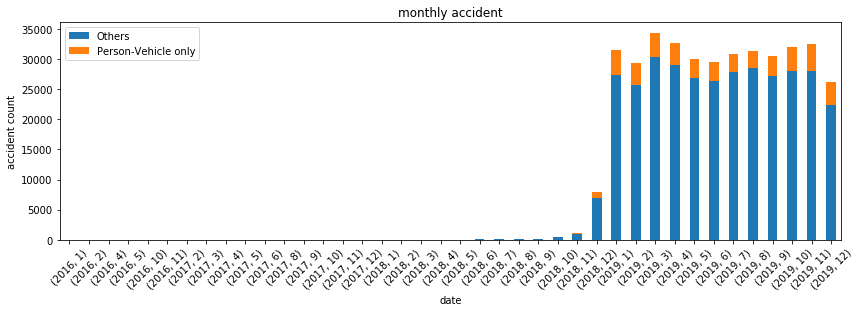

In [96]:
monthly_accident_count = df[df["事故類型"]!=1].groupby(['発生日時　　年', '発生日時　　月']).size()
monthly_person_accident_count = df[df["事故類型"]==1].groupby(['発生日時　　年', '発生日時　　月']).size()
df_monthly_count = pd.concat([monthly_accident_count, monthly_person_accident_count], axis=1)
df_monthly_count.columns = ["Others","Person-Vehicle only"]

ax = df_monthly_count.plot(kind="bar", figsize=(14,4), stacked=True, rot=45)
ax.set_xlabel("date")
ax.set_ylabel("accident count")
ax.set_title("monthly accident")